#Problem 2
Extend the code for mini-batch gradient descent in the notebook `linear_regression_gradient_descent.ipynb` to the case n=2, that is, the model parameters are the two weights w1 and w2 and the bias term b. (You can remove the code for batch-gradient descent and stochastic gradient descent.) Make sure that your code is vectorized.

To solve this problem, you have to create data points that approximately lie on a 2D plane, display these points, and display the predictions of your model after tuning the parameters with gradient descent.

This notebook is an extension of the Notebook for solving linear regression using batch/mini-batch/stochastic gradient descent, found [here](https://github.com/schneider128k/machine_learning_course/blob/master/linear_regression_gradient_descent.ipynb).

###Imports

In [0]:
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

###Generate Random Data

In [0]:
# generate m random pairs (x, y, z)

m = 100
X = 2 * np.random.rand(m, 1)
Z = 4 + 3 * X + np.random.rand(m, 1)
Y = 4 + 3 * X + np.random.rand(m, 1)

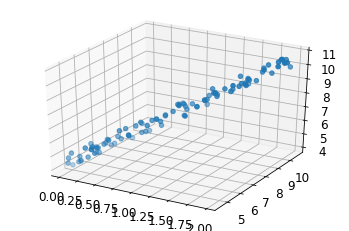

In [61]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(X, Y, Z)

In [64]:
print(X.shape)

(100, 1)


In [63]:
# show the first 5 rows
print(X[:5, :])

[[1.5076594 ]
 [0.04134274]
 [0.53803929]
 [1.0351926 ]
 [0.53769348]]


###Combine bias $b=w_0$ and weights $w_1$ and $w_2$
Linear regression predicts $\hat{y}=b + w_1 x_1 + w_2 x_2$. It will be convenient to rewrite this as a dot product. Define $w=(w_0, w_1, w_2)$ and $x=(1, x_1, x_2)$. Then, we have $\hat{y}=w \boldsymbol{\cdot} x$.

In [65]:
# add x0 = 1
X_b = np.column_stack([np.ones((m, 1)), X])
X_b = np.column_stack([X_b, Y])
print(X_b.shape)

(100, 3)


In [66]:
print(X_b[:5, :])

[[1.         1.5076594  9.30974771]
 [1.         0.04134274 4.52147637]
 [1.         0.53803929 6.12772893]
 [1.         1.0351926  7.35893498]
 [1.         0.53769348 6.60074005]]


In [0]:
# create array with x1=0 and x1=2
X_new = np.array([[0], [2]])
# add x0 = 1 to each instance
X_new_b = np.column_stack([np.ones((2, 1)), X_new])

In [58]:
print(X_new_b)

[[1. 0.]
 [1. 2.]]


###Linear regression using mini-batch gradient descent
A few training examples are selected to compute the gradient.

In [0]:
# number of epochs
epochs = 20
# learning rate
lr = 0.01
# fix initial random weight for gradient descent (batch gradient descent)
np.random.seed(42)
initial_weight = np.random.randn(3, 1)

In [0]:
weight = initial_weight
weight_path_mgd = []
batch_size = 4

weight_path_mgd.append(weight)
for epoch in range(epochs):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    #print(X_b_shuffled)
    z_shuffled = Z[shuffled_indices]
    #print(z_shuffled)
    for i in range(0, m, batch_size):
        xi = X_b_shuffled[i:i+batch_size]
        zi = z_shuffled[i:i+batch_size]
        gradient = 1 / batch_size * xi.T.dot(xi.dot(weight) - zi)
        weight = weight - lr * gradient
        weight_path_mgd.append(weight)

In [86]:
weight_path_mgd[-1]

array([[0.43262727],
       [0.16139985],
       [0.94580038]])

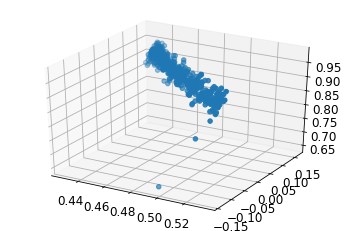

In [93]:
weight_path_mgd = np.array(weight_path_mgd)
#plt.figure(figsize=(12,12))

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(weight_path_mgd[:, 0], weight_path_mgd[:, 1], weight_path_mgd[:, 2])
#plt.legend(loc="upper left", fontsize=16)
#plt.xlabel(r"$w_0$", fontsize=20)
#plt.ylabel(r"$w_1$   ", fontsize=20, rotation=0)
#plt.axis([-1, 5, -1, 4])
#plt.show()

#Sources
https://github.com/schneider128k/machine_learning_course/blob/master/linear_regression_gradient_descent.ipynb

https://github.com/schneider128k/machine_learning_course/blob/master/slides/linear_regression_simple.pdf